## Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models #type:ignore
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


#  ConvBlock

**ConvBlock = Conv2D → BatchNormalization → Activation**  
A fundamental building block in CNNs that **extracts spatial features**, **normalizes** them for stability, and **adds nonlinearity** for expressiveness.

---

###  Conv2D (No Bias)

* **Operation:** Applies a 2D convolution using learnable filters (kernels).  
  Each filter slides spatially over the input tensor and computes:

  <br>

  $$
  y_{i,j,k} = \sum_{m,n,c} X_{i+m,\,j+n,\,c} \cdot W_{m,n,c,k}
  $$

  <br>

* **Where:**

  $$
  \begin{aligned}
  &\bullet\; X_{i,j,c}: && \text{Input feature map value at spatial position } (i,j) \text{ and channel } c \\[6pt]
  &\bullet\; W_{m,n,c,k}: && \text{Weight of the kernel at offset } (m,n), \text{ input channel } c, \text{ and filter } k \\[6pt]
  &\bullet\; y_{i,j,k}: && \text{Output feature map value at } (i,j) \text{ for output channel } k \\[6pt]
  &\bullet\; (m,n): && \text{Kernel window coordinates} \\[6pt]
  &\bullet\; (i,j): && \text{Output spatial indices} \\[6pt]
  &\bullet\; c: && \text{Input channel index} \\[6pt]
  &\bullet\; k: && \text{Output channel (filter) index}
  \end{aligned}
  $$

  <br>

* **Parameters (weights):**

  $$
  \text{Params}_{\text{Conv}} = C_{\text{out}} \times C_{\text{in}} \times K \times K
  $$

  where  

  $$
  \begin{aligned}
  &C_{\text{in}}: && \text{number of input channels} \\[4pt]
  &C_{\text{out}}: && \text{number of output channels (filters)} \\[4pt]
  &K: && \text{kernel size (height = width = K)}
  \end{aligned}
  $$

  <br>

* **Output shape** (for `"padding='same'"`):

<br>

  $$
  H_{\text{out}} = \left\lceil \frac{H_{\text{in}}}{\text{stride}} \right\rceil, \quad
  W_{\text{out}} = \left\lceil \frac{W_{\text{in}}}{\text{stride}} \right\rceil
  $$

  where

  $$
  \begin{aligned}
  &H_{\text{in}},\, W_{\text{in}}: && \text{Input height and width} \\[6pt]
  &H_{\text{out}},\, W_{\text{out}}: && \text{Output height and width} \\[6pt]
  &\text{stride}: && \text{Step size of the convolution kernel}
  \end{aligned}
  $$

<br>

* **FLOPs (multiply–add operations):**

<br>

  $$
  \text{FLOPs} \approx H_{\text{out}} \times W_{\text{out}} \times C_{\text{out}} \times (K \times K \times C_{\text{in}})
  $$

<br>

  - Measures the computational cost of the convolution layer.

<br>



###  **Example:-**

Input = (224×224×3), kernel = (3×3), filters = 16, stride = 2, padding = "same"

<br>

**Parameter Count**

$$
\text{Params}*{\text{Conv}} = C*{\text{out}} \times C_{\text{in}} \times K \times K
$$

$$
\text{Params}_{\text{Conv}} = 16 \times 3 \times 3 \times 3 = 432
$$

<br>

**Output Shape Calculation**

For `"padding='same'"`:

$$
H_{\text{out}} = \left\lceil \frac{H_{\text{in}}}{\text{stride}} \right\rceil,
\quad
W_{\text{out}} = \left\lceil \frac{W_{\text{in}}}{\text{stride}} \right\rceil
$$

$$
H_{\text{out}} = \left\lceil \frac{224}{2} \right\rceil = 112,
\quad
W_{\text{out}} = \left\lceil \frac{224}{2} \right\rceil = 112
$$

$$
C_{\text{out}} = 16
$$

<br>

**Final Output Shape**

$$
( H_{\text{out}},; W_{\text{out}},; C_{\text{out}} ) = (112,, 112,, 16)
$$

<br>

**Approximate FLOPs**

$$
\text{FLOPs} \approx H_{\text{out}} \times W_{\text{out}} \times C_{\text{out}} \times (K \times K \times C_{\text{in}})
$$

$$
\text{FLOPs} = 112 \times 112 \times 16 \times (3 \times 3 \times 3) = 5{,}419{,}008
$$

<br>


---

###  Batch Normalization
- [youtube link](https://www.youtube.com/watch?v=yXOMHOpbon8)

* **Goal:** Normalize feature maps per channel to stabilize and speed up training.

* **Equation:**

  $$
  \hat{x} = \frac{x - \mu_{\text{batch}}}{\sqrt{\sigma^2_{\text{batch}} + \epsilon}}, \qquad
  y = \gamma \cdot \hat{x} + \beta
  $$

$$
\begin{aligned}
&x: && \text{Activation before normalization} \\[6pt]
&\mu_{\text{batch}},\, \sigma^2_{\text{batch}}: && \text{Mean and variance computed over the batch} \\[6pt]
&\gamma,\, \beta: && \text{Learnable scale and shift parameters} \\[6pt]
&\epsilon: && \text{Small constant to prevent division by zero}
\end{aligned}
$$



---

### Activation Functions

**ReLU (Rectified Linear Unit):**
- [youtube link](https://www.youtube.com/watch?v=Y9qdKsOHRjA)
$$
\text{ReLU}(x) = \max(0, x)
$$

- Introduces nonlinearity  
- Zeroes out negative activations  
- Keeps gradients stable for positive inputs


**Hard-Swish:**

$$
\text{h-swish}(x) = x \cdot \frac{\text{ReLU6}(x + 3)}{6}, \qquad
\text{ReLU6}(z) = \min(\max(0, z), 6)
$$


---

### Numeric Example
| Component | Formula | Result |
|:----------:|:--------|:-------|
| Conv params | \(16 * 3 * 3 * 3\) | **432** |
| BN params | \(2 * 16\) | **32** |
| Output shape | \((112, 112, 16)\) |  |
| Approx FLOPs | \(112 * 112 * 16 * 27 = 5,419,008\) | **≈ 5.42M** |

---


In [14]:
def ConvBlock(x, filters, kernel, stride=1, act='hardswish'):

    x = layers.Conv2D(
        filters,                                        # Number of output channels (feature maps)
        kernel,                                         # Kernel size (e.g., 3 → 3×3 filter)
        strides=stride,                                 # Stride — how far the kernel moves per step
        padding='same',                                 # Keeps output size same as input
        use_bias=False,                                 # Disable bias (BatchNorm will handle shift)
        kernel_initializer='he_normal'                  # He initialization (best for ReLU-based nets)
    )(x)

    x = layers.BatchNormalization()(x)                  # Normalizes activations for stable training

    if act == 'relu':
        x = layers.ReLU()(x)                            # Standard ReLU
    elif act == 'hardswish':
        x = layers.Activation('hard_swish')(x)          # Efficient variant used in MobileNetV3

    return x


#  Squeeze and Excitation (SE) Block

![ResB + SE block diagram](https://raw.githubusercontent.com/nasim-raj-laskar/MobileNetv3-scratch/refs/heads/main/assets/image.png)

*Squeeze (Global Avg Pool) → Excitation (FC layers) → Scale (channel reweighting).*

---

### Overview

The **Squeeze-and-Excitation (SE) Block** adaptively recalibrates channel-wise feature responses by explicitly modeling interdependencies between channels.

| Symbol | Meaning | Code Equivalent | Output Shape |
|:-------:|:---------|:----------------|:--------------|
| **H, W** | Height & Width of feature map | Input tensor `x` | (H, W, C) |
| **C** | Number of channels (filters) | `filters` argument | — |
| **Squeeze** | Global Average Pooling | `GlobalAveragePooling2D()` | (C,) |
| **FC₁ (C → C/4)** | Dimensionality reduction | `Dense(filters // 4, activation='relu')` | (C/4,) |
| **FC₂ (C/4 → C)** | Dimensionality expansion | `Dense(filters, activation='hard_sigmoid')` | (C,) |
| **Reshape** | Prepare for channel scaling | `Reshape((1, 1, filters))` | (1, 1, C) |
| **Scale** | Channel-wise reweighting | `Multiply()([x, se])` | (H, W, C) |

---



In [15]:
def SeBlock(x, filters):
    # Squeeze: Global Average Pooling (output shape: (C,))
    se = layers.GlobalAveragePooling2D()(x)

    # Excitation: Fully Connected layers to model inter-channel dependencies
    se = layers.Dense(filters // 4, activation='relu')(se)          # FC₁: C → C/4
    se = layers.Dense(filters, activation='hard_sigmoid')(se)       # FC₂: C/4 → C

    # Reshape: Prepare for broadcasting during scaling
    se = layers.Reshape((1, 1, filters))(se)

    # Scale: Channel-wise multiplication with input tensor
    return layers.Multiply()([x, se])

# Bottleneck Block  
*Prerequisite* → [YouTube link](https://www.youtube.com/watch?v=ocleY6pRPkY&t=806s)

#### Expanded Conv → Depthwise → SE → Project  
![](assets\bneck.png)

---

`x → Expand → Depthwise → SE → Project → y`

---

#### **1. Expansion (1×1 Convolution)**

Expands input channels to increase representational power.

<br>

$$
x_{exp} = \sigma(W_{exp} * x)
$$

<br>

$$
\begin{aligned}
&W_{exp}: && \text{1×1 convolution weights} \\[4pt]
&\sigma: && \text{Activation function (ReLU or Hard-Swish)} \\[4pt]
&C_{in} \rightarrow C_{exp}: && \text{Channel expansion}
\end{aligned}
$$

---

#### **2. Depthwise Convolution**

Applies a spatial convolution per channel.
<br>

$$
x_{dw} = \sigma(\text{BN}(W_{dw} \odot x_{exp}))
$$
<br>

$$
\begin{aligned}
&W_{dw}: && \text{Depthwise kernel (K×K, one per channel)} \\[4pt]
&\odot: && \text{Depthwise convolution operation} \\[4pt]
&\text{BN}: && \text{Batch Normalization layer}
\end{aligned}
$$

---

#### **3. Squeeze-and-Excitation (SE) Block**

Applies channel-wise attention to recalibrate feature responses.

<br>

$$
s = \sigma(W_2 \, \delta(W_1 \, \text{GAP}(x_{dw})))
$$

<br>

$$
x_{se} = s \odot x_{dw}
$$

$$
\begin{aligned}
&\text{GAP}: && \text{Global Average Pooling} \\[4pt]
&\delta: && \text{ReLU activation} \\[4pt]
&\sigma: && \text{Sigmoid activation} \\[4pt]
&s: && \text{Learned scaling vector}
\end{aligned}
$$

---

#### **4. Projection (1×1 Convolution)**

Compresses expanded channels back to the output dimension.

<br>


$$
x_{proj} = \text{BN}(W_{proj} * x_{se})
$$

<br>

$$
\begin{aligned}
&W_{proj}: && \text{1×1 convolution weights} \\[4pt]
&\text{BN}: && \text{Batch Normalization (no activation)} \\[4pt]
&C_{exp} \rightarrow C_{out}: && \text{Channel reduction (Linear bottleneck)}
\end{aligned}
$$

---

#### **5. Residual Connection**

Adds shortcut connection if spatial and channel dimensions match.

$$
y =
\begin{cases}
x_{proj} + x, & \text{if } stride = 1 \text{ and } C_{in} = C_{out} \\[4pt]
x_{proj}, & \text{otherwise}
\end{cases}
$$

---

#### **Final Expression**

$$
y = f_{proj}(f_{SE}(f_{DW}(f_{EXP}(x)))) + \mathbb{1}_{(stride=1,\,C_{in}=C_{out})} \cdot x
$$


In [16]:
def BNeck(x, in_ch, exp_ch, out_ch, kernel, stride, use_se, activation):
    """
    Flow: x → Expand → Depthwise → SE → Project → y
    """

    # 1. Expansion (1×1 Conv): C_in → C_exp
    # Equation:  x_exp = σ(W_exp * x)
    x_exp = ConvBlock(x, exp_ch, 1, act=activation)

    # 2. Depthwise Conv (K×K): per-channel spatial conv
    # Equation:  x_dw = σ(BN(W_dw ⊙ x_exp))
    x_dw = layers.DepthwiseConv2D(kernel,
                                  strides=stride,
                                  padding='same',
                                  use_bias=False)(x_exp)

    x_dw = layers.BatchNormalization()(x_dw)
    x_dw = layers.ReLU()(x_dw) if activation == 'relu' else layers.Activation('hard_swish')(x_dw)

    # 3. Squeeze–Excitation (SE): channel attention
    # Equation:  s = σ(W₂ δ(W₁ GAP(x_dw))) ,   x_se = s ⊙ x_dw
    if use_se:
        x_dw = SeBlock(x_dw, exp_ch)

    # 4. Projection (1×1 Conv): linear bottleneck C_exp → C_out
    # Equation:  x_proj = BN(W_proj * x_dw)
    x_proj = layers.Conv2D(out_ch,
                           1,
                           padding='same',
                           use_bias=False)(x_dw)
    x_proj = layers.BatchNormalization()(x_proj)

    # 5. Residual Connection (skip): if stride=1 and C_in=C_out
    # Equation:  y = x_proj + x
    if stride == 1 and in_ch == out_ch:
        x_proj = layers.Add()([x_proj, x])

    return x_proj


# **MobileNetV3-Large — Specs**

![](assets\l-specs.png)


* **Input** → Input resolution and channels (e.g., `224×224×3`)

* **Operator** → Type of layer (e.g., `Conv`, `BNeck`, `Pool`, etc.)
* **exp size** → Number of **expanded channels** after the first 1×1 convolution inside the bottleneck
* **#out** → Number of **output channels** after projection (the final 1×1 convolution)
* **SE** → Indicates **Squeeze-and-Excitation** usage

  * `✓` → SE block **enabled**
  * *(blank)* → SE block **disabled*
* **NL** → **Non-linearity (activation)** used

  * `RE` → **ReLU**
  * `HS` → **Hard-Swish** (*x · ReLU6(x + 3)/6*)
* **s** → **Stride** for the depthwise convolution (`1` = same spatial size, `2` = downsample)

In [17]:
def MobileNetV3_Large(input_shape=(224, 224, 3), num_classes=1000):
    inputs = layers.Input(shape=input_shape)

    # Initial Convolution Layer, Input: 224×224×3 → Output: 112×112×16
    x = ConvBlock(inputs, 16, 3, stride=2, act='hardswish')

    # Stage 1 , Shallow feature learning with small filters (3×3)

    x = BNeck(x, 16, 16, 16, 3, 1, False, 'relu')       # stride=1, no SE
    x = BNeck(x, 16, 64, 24, 3, 2, False, 'relu')       # stride=2 → downsample
    x = BNeck(x, 24, 72, 24, 3, 1, False, 'relu')       # stride=1

    # Stage 2 Medium feature extraction; introduce SE and 5×5 depthwise convs

    x = BNeck(x, 24, 72, 40, 5, 2, True, 'relu')        # stride=2, SE on
    x = BNeck(x, 40, 120, 40, 5, 1, True, 'relu')
    x = BNeck(x, 40, 120, 40, 5, 1, True, 'relu')

    # Stage 3 , Deeper representation; switch to Hard-Swish activations

    x = BNeck(x, 40, 240, 80, 3, 2, False, 'hardswish') # stride=2 → downsample
    x = BNeck(x, 80, 200, 80, 3, 1, False, 'hardswish')
    x = BNeck(x, 80, 184, 80, 3, 1, False, 'hardswish')
    x = BNeck(x, 80, 184, 80, 3, 1, False, 'hardswish')
    x = BNeck(x, 80, 480, 112, 3, 1, True, 'hardswish') # SE enabled
    x = BNeck(x, 112, 672, 112, 3, 1, True, 'hardswish')

    # Stage 4, High-level features; larger receptive field (5×5)

    x = BNeck(x, 112, 672, 160, 5, 2, True, 'hardswish') # stride=2 → downsample
    x = BNeck(x, 160, 960, 160, 5, 1, True, 'hardswish')
    x = BNeck(x, 160, 960, 160, 5, 1, True, 'hardswish')

    # Final Layers
    x = ConvBlock(x, 960, 1, act='hardswish')            # 1×1 conv for fusion
    x = layers.GlobalAveragePooling2D()(x)               # Global feature aggregation
    x = layers.Reshape((1, 1, 960))(x)                   # Shape → (1, 1, 960)
    x = ConvBlock(x, 1280, 1, act='hardswish')           # Final 1×1 conv
    x = layers.Dropout(0.8)(x)                           # Regularization
    x = layers.Conv2D(num_classes, 1)(x)                 # Class logits
    x = layers.Flatten()(x)                              # Flatten for softmax

    return models.Model(inputs, x, name="MobileNetV3_Large")


if __name__ == "__main__":
    model = MobileNetV3_Large()
    model.summary()


Model: "MobileNetV3_Large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 112, 112,  │        432 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │         64 │ conv2d_34[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_21       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 112, 112,  │        256 │ activation_21[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │         64 │ conv2d_35[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_12 (ReLU)     │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_15 │ (None, 112, 112,  │        144 │ re_lu_12[0][0]    │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │         64 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_13 (ReLU)     │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 112, 112,  │        256 │ re_lu_13[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │         64 │ conv2d_36[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │ activation_21[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 112, 112,  │      1,024 │ add_10[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_37[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_14 (ReLU)     │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_16 │ (None, 56, 56,    │        576 │ re_lu_14[0][0]  

 Total params: 5,509,758 (21.02 MB)

 Trainable params: 5,482,766 (20.92 MB)

 Non-trainable params: 26,992 (105.44 KB)

![](https://media.makeameme.org/created/let-the-training.jpg)

## Load a Sample dataset

In [21]:
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)
train_ds = dataset['train']
num_classes = info.features['label'].num_classes

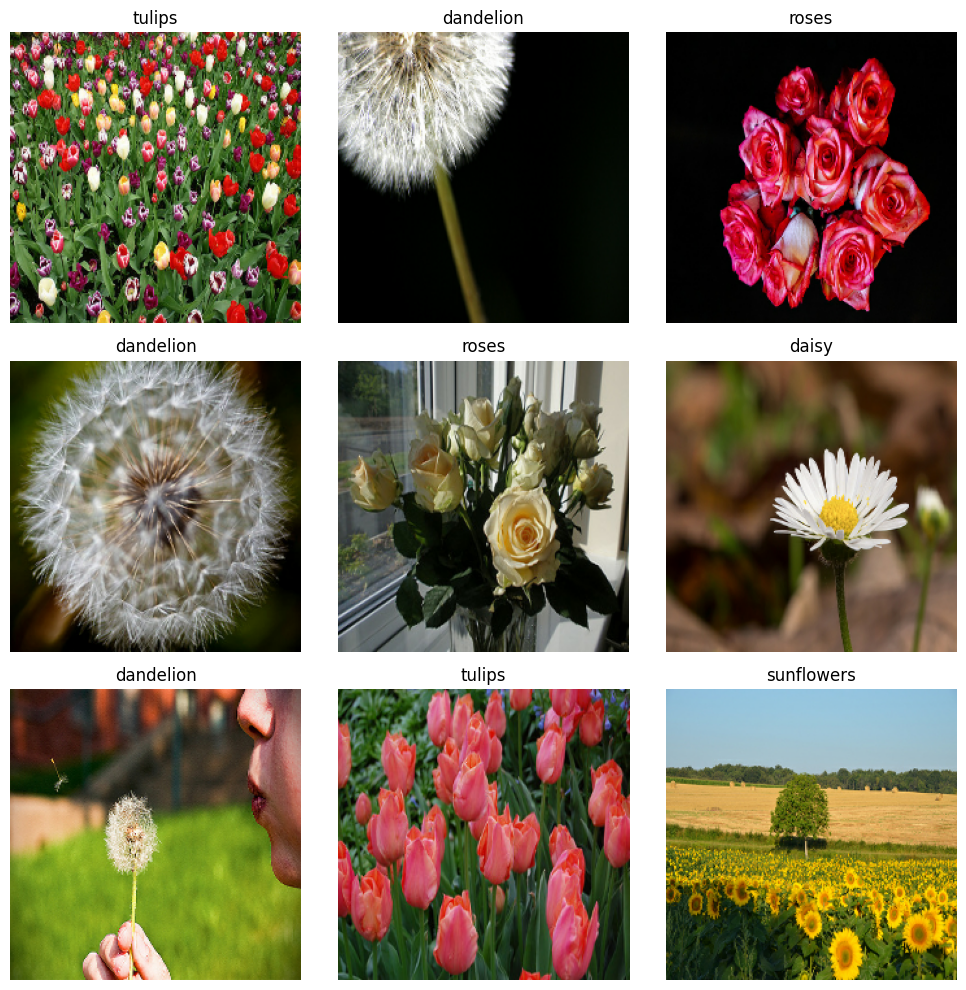

In [40]:
get_label_name = info.features['label'].int2str

# Unbatch and preprocess for visualization
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.uint8)  # convert to uint8 for display
    image = tf.image.resize(image, (224, 224))             # resize for consistency
    return image, label

train_ds = train_ds.map(preprocess)

# Plot 3×3 grid
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(get_label_name(int(label)))
    plt.axis("off")

plt.tight_layout()
plt.show()

### Preprocess Dataset

In [26]:
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = (
    train_ds
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(1000)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

### Load the model - mobilenetv3

In [27]:
model = MobileNetV3_Large(input_shape=(224, 224, 3), num_classes=num_classes)

## Compile and train

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=30)

Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 109s 387ms/step - accuracy: 0.3243 - loss: 2.0053
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.5057 - loss: 1.3746
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.5601 - loss: 1.2989
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.5996 - loss: 1.1557
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.5797 - loss: 1.2080
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.6131 - loss: 1.1715
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.6728 - loss: 1.0452
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.5930 - loss: 1.2206
Epoch 9/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.6293 - loss: 1.0097
Epoch 10/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.6616 - loss: 1.0188
Epoch 11/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.6403 - loss: 1.1175
Epoch 12/30
115/115 ━━━━━━━━

In [29]:
model.save("flower.h5")

## Accuracy Curve

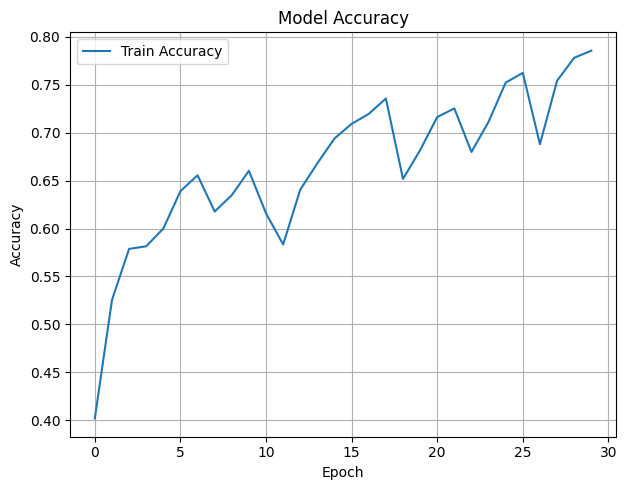

In [43]:
plt.figure(figsize=(12, 5))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Test

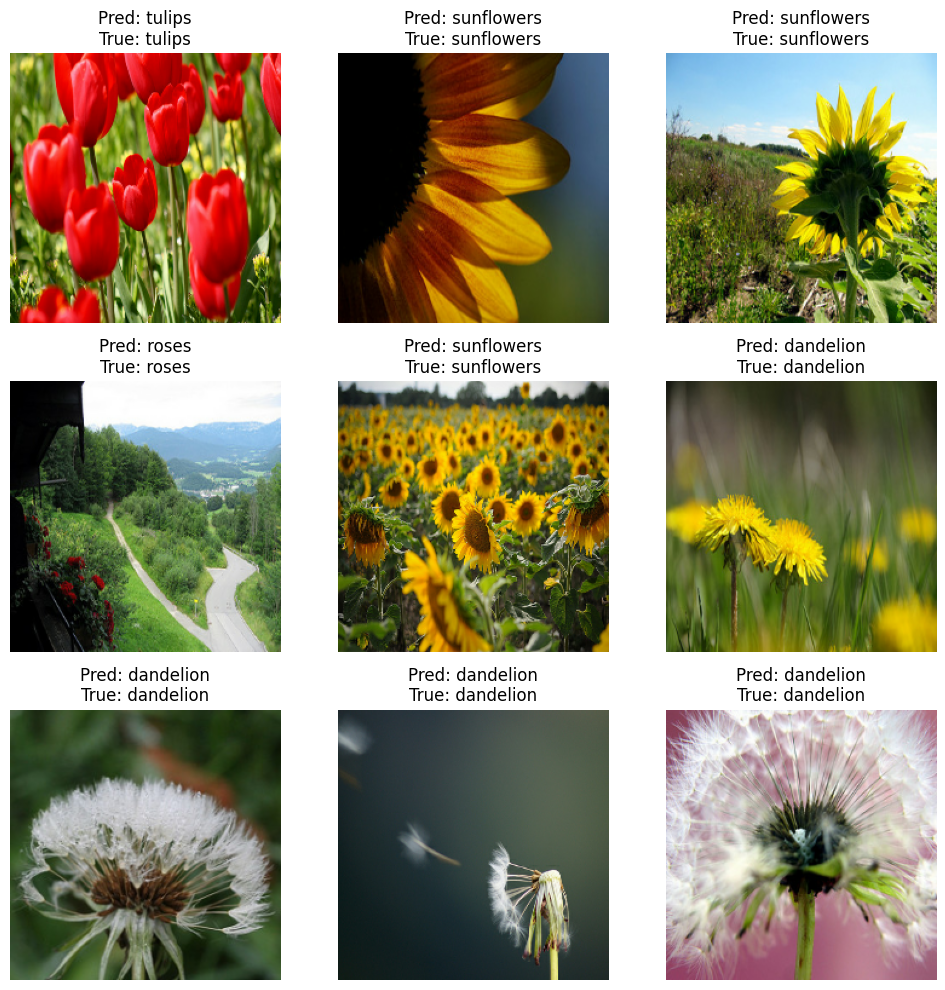

In [44]:
# Load the saved model
model = tf.keras.models.load_model('flower.h5')

# Load dataset
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)
test_ds = dataset['train']

# Label name function
get_label_name = info.features['label'].int2str

# Preprocess function
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224)) / 255.0
    return image, label

# Take 9 test samples
sample_ds = test_ds.map(preprocess).take(9)

# Predict and plot
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(sample_ds):
    ax = plt.subplot(3, 3, i + 1)
    pred = model.predict(tf.expand_dims(image, axis=0), verbose=0)
    pred_label = tf.argmax(pred, axis=1).numpy()[0]
    plt.imshow(image)
    plt.title(f"Pred: {get_label_name(pred_label)}\nTrue: {get_label_name(label)}")
    plt.axis("off")
plt.tight_layout()
plt.show()